In [30]:
import numpy as np
import pandas as pd
import os
# Correctly initialize the DataFrame with column names
theta_rej = pd.DataFrame(columns=['Theta', 'Rejection Rate'])
FILE_NAME = 'penalty_3.09_window_12.txt'
path = os.path.join(os.getcwd(),'results/theta_rej_rate' ,FILE_NAME)
with open(path, 'r') as results:
    lines = results.readlines()
    for line in lines:
        parts = line.split(',')
        if len(parts) == 2:  # Check if the line is correctly formatted
            theta = float(parts[0].split(':')[1].strip())
            rej_rate = float(parts[1].split(':')[1].strip())
            
            # Append the new row to the DataFrame, set ignore_index=True to reindex
            theta_rej.loc[len(theta_rej)] = [theta,rej_rate]
theta_rej.sort_values(by='Theta', inplace=True)
theta_rej

,Theta,Rejection Rate
62,0.0,0.343228
73,0.0,0.347598
131,0.0,0.350922
77,0.0,0.357068
117,0.0,0.339358
...,...,...
12,10.0,0.369907
23,10.0,0.367448
14,10.0,0.365399
16,10.0,0.360710


In [33]:
# Calculating mean rejection rate for each theta
mean_rejection_rates = theta_rej.groupby('Theta')['Rejection Rate'].mean().head(11)
mean_rejection_rates

Theta
0.00    0.346113
0.01    0.353435
0.02    0.351268
0.03    0.353289
0.04    0.350885
0.05    0.354227
0.06    0.356895
0.07    0.359162
0.08    0.357960
0.09    0.356968
0.10    0.356236
Name: Rejection Rate, dtype: float64

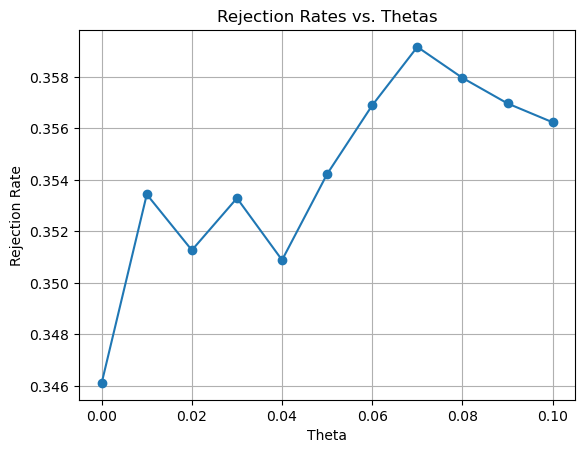

In [34]:
from matplotlib import pyplot as plt
# Plot
theta_list = mean_rejection_rates.index
rej_rate_list = mean_rejection_rates.values
plt.plot(theta_list, rej_rate_list, marker='o')
plt.xlabel('Theta')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates vs. Thetas')
# plt.xticks(theta_list, rotation=90)
plt.grid(True)
plt.show()